# TME 1: Problème de Bandits

## Imports

In [1]:
import numpy as np
import pandas as pd
import random
from tme1 import UCB, LinUCB

## Data

In [2]:
header = ["id"] + ["repr" + str(i) for i in range(1,6)]+["clics"+str(i) for i in range(1,11)]
data=pd.read_csv("CTR.txt",sep=':|;',header=None, names = header)
data

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,id,repr1,repr2,repr3,repr4,repr5,clics1,clics2,clics3,clics4,clics5,clics6,clics7,clics8,clics9,clics10
0,0,0.748371,0.835208,0.076699,0.172439,0.143446,0.103419,0.190698,0.000000,0.102401,0.036312,0.074562,0.234702,0.000000,0.000000,0.078574
1,1,0.168419,0.133754,0.434864,0.995678,0.048800,0.000000,0.000000,0.000000,0.020827,0.000000,0.000000,0.022586,0.000000,0.146548,0.324596
2,2,0.485287,0.566989,0.041657,0.962560,0.185080,0.109575,0.136626,0.000000,0.098411,0.074771,0.000000,0.000000,0.000000,0.014760,0.193677
3,3,0.622231,0.196123,0.131147,0.439719,0.298934,0.000000,0.151069,0.000000,0.127239,0.112239,0.000000,0.012022,0.034284,0.000000,0.086177
4,4,0.331710,0.086411,0.023036,0.925518,0.333580,0.000000,0.109214,0.000000,0.151938,0.049861,0.000000,0.000000,0.037427,0.118916,0.216592
5,5,0.109601,0.879662,0.353879,0.669680,0.376216,0.089459,0.209107,0.000000,0.120088,0.000000,0.000000,0.078749,0.000000,0.000000,0.241406
6,6,0.127865,0.602231,0.986143,0.267415,0.488381,0.000000,0.045596,0.000000,0.441938,0.064135,0.000000,0.185478,0.142613,0.000000,0.245626
7,7,0.229038,0.506290,0.091916,0.781189,0.617084,0.104684,0.081973,0.000000,0.127450,0.085391,0.000000,0.000000,0.000000,0.000000,0.184564
8,8,0.421367,0.416732,0.965223,0.508880,0.212582,0.021246,0.000000,0.000000,0.245925,0.007313,0.000000,0.097657,0.092145,0.000000,0.318084
9,9,0.444963,0.583060,0.346337,0.370545,0.733722,0.000000,0.165378,0.000000,0.214613,0.014049,0.000000,0.055444,0.000000,0.000000,0.201386


In [40]:
annonceur=data[["clics"+str(i) for i in range(1,11)]].columns

## Stratégie Random

Consiste à choisir n'importe quel annonceur pour chaque texte.

In [41]:
data['Random']=data.apply(lambda x : random.choice(["clics"+str(i) for i in range(1,11)]),axis=1)

## Stratégie StaticBest

Consiste à choisir l'annonceur avec le meilleur taux de clics cumulés.

In [43]:
data['StaticBest']=data.apply(lambda x : data[["clics"+str(i) for i in range(1,11)]].sum(0).argmax(),axis=1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if __name__ == '__main__':


## Stratégie Optimale

Consiste ici donc à choisir l'annonceur qui a le meilleur taux de clics à cette itération.

In [44]:
data['Optimal']=data[["clics"+str(i) for i in range(1,11)]].idxmax(axis=1)

## Visualisation 

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Visualisation des Gains pour les baselines')

<Figure size 432x288 with 0 Axes>

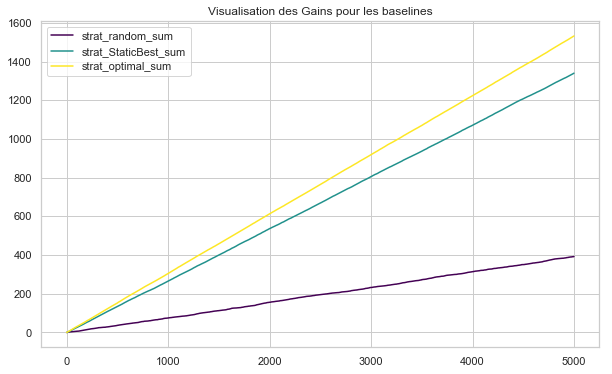

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style('whitegrid')
%matplotlib inline
data['random_sum']=data.apply(lambda x : x[x['Random']],axis=1)
data['StaticBest_sum']=data.apply(lambda x : x[x['StaticBest']],axis=1)
data['Optimal_sum']=data.apply(lambda x : x[x['Optimal']],axis=1)
plt.figure()
data[['strat_random_sum','strat_StaticBest_sum','strat_optimal_sum']].cumsum().plot(colormap='viridis', figsize=(10, 6))
plt.title("Visualisation des Gains pour les baselines")
plt.show()

In [47]:
def gain(actions,dataset):
    gain = np.array([dataset[i][actions[i]] for i in range(actions.shape[0])])
    return gain

def regret(actions,dataset):
    gain_local = gain(actions,dataset)   
    regret = dataset.max(1) - gain_local
    return regret

# UCB

In [48]:
n_samples = data[["clics"+str(i) for i in range(1,11)]].values.shape[0]

In [49]:
UCB(data[["clics"+str(i) for i in range(1,11)]].values)

array([0, 1, 2, ..., 3, 3, 3])

Text(0.5, 1.0, 'Visualisation Gain UCB')

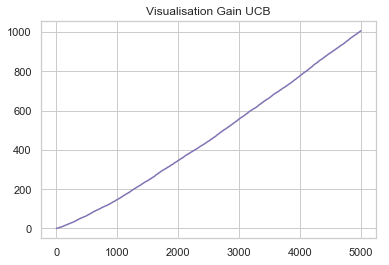

In [50]:
cliks = data[["clics"+str(i) for i in range(1,11)]].values
dataset = cliks
politique_UCB = UCB(dataset)

gain_UCB = gain(politique_UCB,dataset)
import matplotlib.pyplot as plt
plt.plot(gain_UCB.cumsum(),color='m')
plt.title("Visualisation Gain UCB")

Text(0.5, 1.0, 'Visualisation regret UCB')

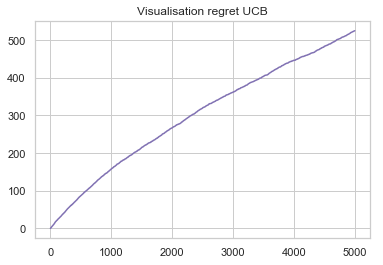

In [57]:
regret_UCB = regret(politique_UCB,dataset)
plt.plot(regret_UCB.cumsum(),color='m')
plt.title("Visualisation regret UCB")

In [51]:
def load(filename):
    f = open(filename, 'r')
    carac_doc = []
    cliks = []
    for line in f.readlines():
        line = line[:-2].split(':')
        carac_doc.append(line[1].split(';'))
        cliks.append(line[2].split(';'))
    return np.array(carac_doc,float), np.array(cliks,float)

# LIN UCB

In [52]:
carac_doc,cliks = load("CTR.txt")

In [53]:
Context = carac_doc
dataset = cliks
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)

In [ ]:
Context = carac_doc
dataset = cliks
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)
gain_LinUCB = gain(politique_LinUCB,dataset)
plt.plot(gain_LinUCB.cumsum(),color='c')

In [ ]:
regret_LinUCB = regret(politique_LinUCB,dataset)
plt.plot(regret_LinUCB.cumsum())
plt.title("Visualisation regret UCB")

# Optimisation de la valeur de $\alpha$ pour LinUCB

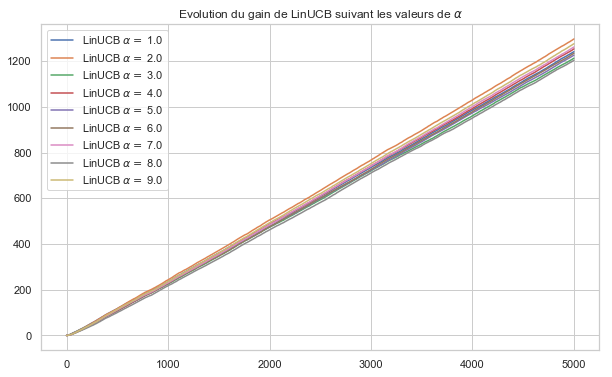

In [29]:
plt.figure(figsize=(10, 6))
gain_max = []
for alpha in np.arange(1,10):
    politique_LinUCB = LinUCB(Context,dataset,alpha=alpha)
    gain_LinUCB = gain(politique_LinUCB,dataset)
    plt.plot(gain_LinUCB.cumsum(),label=r'LinUCB $\alpha = $ %.1f'%alpha)
    gain_max.append(gain_LinUCB.cumsum()[-1])
plt.legend()
plt.title(r"Evolution du gain de LinUCB suivant les valeurs de $\alpha$")
plt.show();

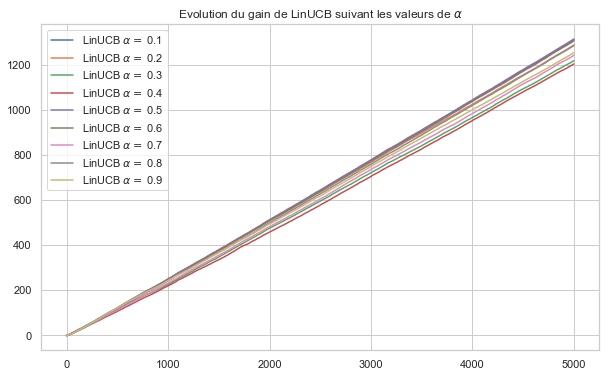

In [31]:
plt.figure(figsize=(10, 6))
gain_max = []
for alpha in np.arange(0.1,1,0.1):
    politique_LinUCB = LinUCB(Context,dataset,alpha=alpha)
    gain_LinUCB = gain(politique_LinUCB,dataset)
    plt.plot(gain_LinUCB.cumsum(),label=r'LinUCB $\alpha = $ %.1f'%alpha)
    gain_max.append(gain_LinUCB.cumsum()[-1])
plt.legend()
plt.title(r"Evolution du gain de LinUCB suivant les valeurs de $\alpha$")
plt.show();

In [59]:
ind_alph = np.array(gain_max).argmax()
alpha = np.arange(0.1,1,0.1)
#print ('La politique maximisant le gain est celle associée au alpha = {}'.format(alpha[ind_alph]))

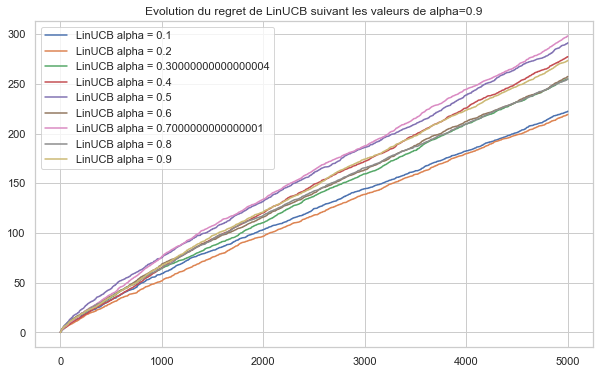

In [32]:
plt.figure( figsize=(10, 6))
regret_min = []
for alpha in np.arange(0.1,1,0.1):
    politique_LinUCB = LinUCB(Context,dataset,alpha=alpha)
    regret_LinUCB = regret(politique_LinUCB,dataset)
    plt.plot(regret_LinUCB.cumsum(),label='LinUCB alpha = {}'.format(alpha))
    regret_min.append(regret_LinUCB.cumsum()[-1])
plt.legend()
plt.title("Evolution du regret de LinUCB suivant les valeurs de alpha={}".format(alpha))
plt.show();

In [58]:
ind_alph = np.array(gain_max).argmin()
alpha = np.arange(0.1,1,0.1)
#print('La politique minimisant le regret est celle associée au alpha = {}'.format(alpha[ind_alph]))

# Comparaisons et Analyses entre les différentes méthodes :

<Figure size 432x288 with 0 Axes>

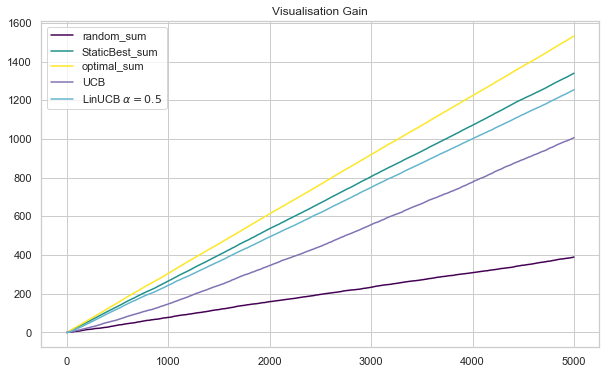

In [54]:
politique_UCB = UCB(dataset)
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)

data['random_sum']=data.apply(lambda x : x[x['Random']],axis=1)
data['StaticBest_sum']=data.apply(lambda x : x[x['StaticBest']],axis=1)
data['optimal_sum']=data.apply(lambda x : x[x['Optimal']],axis=1)
plt.figure()
data[['random_sum','StaticBest_sum','optimal_sum']].cumsum().plot(colormap='viridis', figsize=(10, 6))
plt.plot(gain_UCB.cumsum(),color='m',label="UCB")
plt.plot(gain_LinUCB.cumsum(),color='c',label=r"LinUCB $\alpha = 0.5$")
plt.legend()
plt.title("Visualisation Gain")
plt.show();

In [55]:
dataset = cliks
#gain
data['random_sum']=data.apply(lambda x : x[x['Random']],axis=1)
#regret
regret_random = dataset.max(1)-data['random_sum']

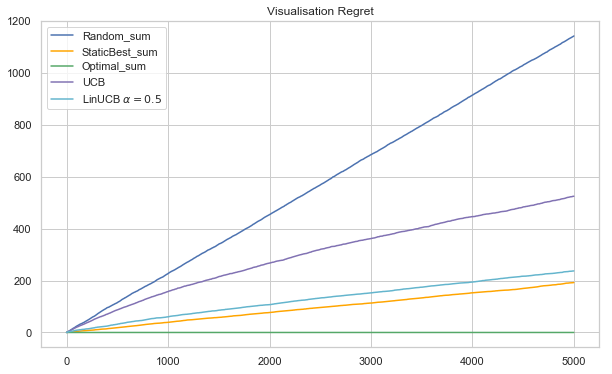

In [56]:
politique_UCB = UCB(dataset)
regret_UCB = regret(politique_UCB,dataset)
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)
regret_LinUCB = regret(politique_LinUCB,dataset)

data['random_sum']=data.apply(lambda x : x[x['Random']],axis=1)
data['StaticBest_sum']=data.apply(lambda x : x[x['StaticBest']],axis=1)
data['optimal_sum']=data.apply(lambda x : x[x['Optimal']],axis=1)

regret_random = dataset.max(1)-data['random_sum']
regret_StaticBest = dataset.max(1)-data['StaticBest_sum']
regret_optimal = dataset.max(1)-data['optimal_sum']

plt.figure(figsize=(10, 6))
plt.plot(regret_random.cumsum(), color='b',label="Random_sum")
plt.plot(regret_StaticBest.cumsum(), color='orange', label="StaticBest_sum")
plt.plot(regret_optimal.cumsum(), color='g',label="Optimal_sum")
plt.plot(regret_UCB.cumsum(),color='m',label="UCB")
plt.plot(regret_LinUCB.cumsum(),color='c',label=r"LinUCB $\alpha = 0.5$")
plt.legend()
plt.title("Visualisation Regret")
plt.show();